# Toil Recompute Datasets
Author: John Vivian

Date: 2-13-16

Let's examine the datasets that comprise the Computational Genomics Lab's RNA-seq Recompute

In [2]:
%matplotlib inline
import boto
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## TCGA
The Cancer Genome Atlas (TCGA) is a comprehensive and coordinated effort to accelerate our understanding of the molecular basis of cancer through the application of genome analysis technologies, including large-scale genome sequencing. TCGA is a joint effort of the National Cancer Institute (NCI) and the National Human Genome Research Institute (NHGRI), two of the 27 Institutes and Centers of the National Institutes of Health, U.S. Department of Health and Human Services.  

11,194 unaligned RNA-seq samples taken from CGHub. 

In [7]:
conn = boto.connect_s3()
bucket = conn.get_bucket('tcga-data-cgl-recompute')
tcga_keys = [key for key in bucket.list()]
tcga_sizes = [key.size / 1024.0**3 for key in tcga_keys]

## GTEx
The Genotype-Tissue Expression (GTEx) program is providing valuable insights into the mechanisms of gene regulation by studying human gene expression and regulation in multiple tissues from healthy individuals; exploring disease-related perturbations in a variety of human diseases; and examining sexual dimorphisms in gene expression and regulation in multiple tissues. 

8,003 unaligned RNA-seq samples taken from dbGaP. 

In [8]:
bucket = conn.get_bucket('gtex-data')
gtex_keys = [key for key in bucket.list()]
gtex_sizes = [key.size / 1024.0**3 for key in gtex_keys]

## TARGET
Therapeutically Applicable Research To Generate Effective Treatments

TARGET applies a comprehensive genomic approach to determine molecular changes that drive childhood cancers. Investigators form a collaborative network to facilitate discovery of molecular targets and translate those findings into the clinic. TARGET is managed by NCI’s Office of Cancer Genomics and Cancer Therapy Evaluation Program.

734 unaligned RNA-seq samples taken from CGHub. 

In [9]:
bucket = conn.get_bucket('target-data-cgl-recompute')
target_keys = [key for key in bucket.list()]
target_sizes = [key.size / 1024.0**3 for key in target_keys]

## PNOC
The Pacific Pediatric Neuro-Oncology Consortium (PNOC) is a network of 15 children’s hospitals that conduct clinical trials of new therapies for children with brain tumors. Our goal is to improve outcomes by translating the latest findings in cancer biology into better treatments for these children.

21 unaligned RNA-seq samples, origin not specified.

In [10]:
bucket = conn.get_bucket('pnoc-samples-cgl-recompute')
pnoc_keys = [key for key in bucket.list()]
pnoc_sizes = [key.size / 1024.0**3 for key in pnoc_keys]

## Size Analysis

In [11]:
df = pd.DataFrame( [tcga_sizes, gtex_sizes, target_sizes, pnoc_sizes] ).T
df.columns = ['TCGA', 'GTEx', 'TARGET', 'PNOC']

In [12]:
df.head()

,TCGA,GTEx,TARGET,PNOC
0,6.268529,3.479345,14.165096,25.290442
1,5.316940,2.913453,14.638624,19.582291
2,6.175922,2.637569,11.443062,16.796875
3,8.143914,3.293272,9.365206,14.038820
4,5.941713,5.286603,14.667807,10.796194


/Users/Jvivian/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


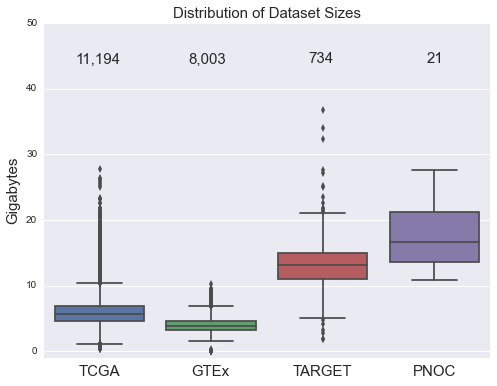

In [13]:
plt.figure(figsize=(8, 6))
p = sns.boxplot(df)
plt.text(-0.2, 44, '11,194', fontsize=15)
plt.text(.8, 44, '8,003', fontsize=15)
plt.text(1.88, 44, '734', fontsize=15)
plt.text(2.93, 44, '21', fontsize=15)
plt.title('Distribution of Dataset Sizes', fontsize=15)
plt.ylabel('Gigabytes', fontsize=15)
plt.ylim([-1, 50])
p.set_xticklabels(['TCGA', 'GTEx', 'TARGET', 'PNOC'], fontsize=15);

## Database TSVs
We want to load all of the dataset information into a database, so we'll makes TSVs for each dataset.

In [16]:
tcga_df = pd.read_csv('tcga.tsv', sep='\t', header=False)

In [19]:
bucket = conn.get_bucket('cgl-rnaseq-recompute')

S3ResponseError: S3ResponseError: 403 Forbidden
